# Linear regression in Python

## Goals of this lecture

- Implementing linear regression in `statsmodels`.  
- Interpreting model summaries:
   - Interpreting *coefficients* for **continuous** data.  
   - Interpreting *coefficients* for **categorical** data.  

##### Libraries

In [1]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as ss

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

## Regression in Python

There are many packages for implementing **linear regression** in Python, but we'll be focusing on [`statsmodels`](https://www.statsmodels.org/stable/index.html).

### Loading our first dataset

In [3]:
df_income = pd.read_csv("data/models/income.csv")
df_income.head(3)

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727


### Exploratory visualization

Does `Education` correlate with `Income`?

<AxesSubplot:xlabel='Education', ylabel='Income'>

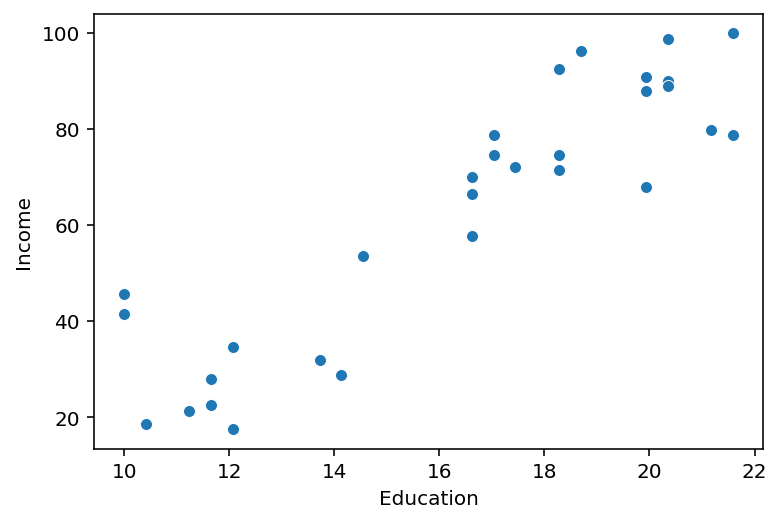

In [4]:
sns.scatterplot(data = df_income, x = "Education", y = "Income")

### Building a regression model

We can build a regression model using [`statsmodels.formula.api.ols`](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html), here imported as `smf`.

```python
smf.ols(data = df_name, formula = "Y ~ X").fit()
```

In [5]:
mod = smf.ols(data = df_income, formula = "Income ~ Education").fit()
type(mod)

statsmodels.regression.linear_model.RegressionResultsWrapper

#### Inspecting output

In [6]:
mod.summary() ### Lots of stuff here!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     120.8
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.15e-11
Time:                        13:09:06   Log-Likelihood:                -115.90
No. Observations:                  30   AIC:                             235.8
Df Residuals:                      28   BIC:                             238.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.9166      9.769     -4.291      0.000     -61.927     -21.906
Education      6.3872      0.581     10.990      0.000       5.197       7.578
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.652
Skew:                           0.140   Prob(JB):                        0.722
Kurtosis:                       2.335   Cond. No.                         75.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Extracing specific information

In [7]:
## coefficients
mod.params

Intercept   -41.916612
Education     6.387161
dtype: float64

In [8]:
## standard errors
mod.bse

Intercept    9.768949
Education    0.581172
dtype: float64

In [9]:
## p-values for coefficients
mod.pvalues

Intercept    1.918257e-04
Education    1.150567e-11
dtype: float64

## Interpreting our model

### The linear equation

Recall that the linear equation is written:

$Y = \beta_0 + \beta_1 * X_1 + \epsilon$

How would these terms **map onto** the coefficients below?

In [10]:
## Coefficients
mod.params

Intercept   -41.916612
Education     6.387161
dtype: float64

#### Rewriting the linear equation

We can *insert* our coefficients into the equation.

$Y = -41.92 + 6.39 * X_1 + \epsilon$

Which can then be used to generate a prediction for a given value of $X$.

In [11]:
x = 20
y = -41.92 + 6.39 * x
print(y) ### our predicted value of Y, given X!

85.88


#### Check-in

Write a function called `predict_y(x)` which takes in a value `x` and outputs a prediction based on these learned coefficients.

In [12]:
### Your code here

#### Solution

In [13]:
def predict_y(x):
    return -41.92 + 6.39 * x

In [14]:
predict_y(10)

21.979999999999997

In [15]:
predict_y(30)

149.77999999999997

### Understanding the *intercept*

> The **intercept** term ($\beta_0$) is the predicted value of $\hat{Y}$ when $X = 0$.

What does this `Intercept` value mean here?

In [16]:
## Coefficients
mod.params

Intercept   -41.916612
Education     6.387161
dtype: float64

#### The intercept and the linear equation

If $X = 0$, the linear equation reduces to:

$Y = -41.92 + \epsilon$


In [17]:
predict_y(0) ### predicted value when x = 0

-41.92

### Understanding the *slope*

> For a **continuous** variable, the *slope* is the predicted change in $Y$ for every 1-unit change in $X$.

What does this *slope* term mean here?

In [18]:
## Coefficients
mod.params

Intercept   -41.916612
Education     6.387161
dtype: float64

### Check-in: more practice with `statsmodels`

Build a regression model predicting `Income` from `Seniority`. What are the `params`? What do they mean?

In [19]:
### Your code here

#### Solution

In [20]:
mod_seniority = smf.ols(data = df_income, formula = "Income ~ Seniority").fit()
mod_seniority.params

Intercept    39.158326
Seniority     0.251288
dtype: float64

#### Check-in

Why were *these* parameters chosen as opposed to some other $\beta_0$ and $\beta_1$?

In [21]:
### Your response here

#### Solution

Linear regression finds the set of parameters $\beta$ that **minimizes the residual sum of squares (RSS)**.

I.e., it finds the **line of best fit**!

### Other relevant output

`statsmodels` also gives us:

- A **standard error** associated with each coefficient.  
- A **t-value** associated with each coefficient.  
- A **p-value** associated with each coefficient.  
- A **confidence interval** associated with each coefficient.

#### Standard error

- These **standard errors** can be used to construct a **confidence interval** around our parameter estimate.  
- Assumption: parameters are **estimates**, which have some amount of *normally-distributed* error.

In [22]:
mod.bse ## Standard error associated with each coefficient

Intercept    9.768949
Education    0.581172
dtype: float64

Can *report* standard error as follows:

> `Education` was positively related with `Income`, $[\beta = 6.34, SE = 0.58]$.

#### t-value and p-value

The **standard error** can also be used to calculate $t$-statistics for each coefficient, which can in turn be used to  estimate a $p$-value to test for significance.

In [23]:
## t-values = params / bse
mod.params / mod.bse

Intercept    -4.290801
Education    10.990148
dtype: float64

In [24]:
## double-checking our work
mod.tvalues

Intercept    -4.290801
Education    10.990148
dtype: float64

In [25]:
## Check for significance
mod.pvalues

Intercept    1.918257e-04
Education    1.150567e-11
dtype: float64

#### Check-in

Knowing what you know about **standard error of the mean**, how do you think our *sample size* affects the standard error for our coefficients?

In [26]:
### Your response here

#### Solution

A larger sample ($n$) results in a **lower standard error**.

*Coming up soon*: We'll discuss how to actually *calculate* standard error for our coefficients.

#### Confidence interval

Finally, the `conf_int` function `return`s a **confidence interval** for all of our parameters.

- This is calculated using the **standard error**.
- By default, this assumes $\alpha = .05$, i.e., a $95\%$ CI.  
 - Crucial assumption is that distribution of **sample statistics** ($\beta$) is **normal**.  

In [27]:
## alpha = .05
mod.conf_int()

,0,1
Intercept,-61.927397,-21.905827
Education,5.196685,7.577637


In [28]:
## alpha = .01
mod.conf_int(alpha = .01)

,0,1
Intercept,-68.910782,-14.922442
Education,4.781232,7.993091


#### Check-in

What is the $95\%$ confidence interval for our coefficients for the model using `Seniority` to predict `Income`?

In [29]:
### Your code here

#### Solution

These could be reported as follows:

> `Seniority` was positively related to `Income`, $[\beta = 0.25]$, $95\%$ $CI = [0.09, 0.41]$.

In [30]:
mod_seniority.conf_int()

,0,1
Intercept,21.714212,56.60244
Seniority,0.090776,0.41180


## Regression with categorical predictors

### What are *categorical* variables?

> A **categorical** (or **qualitative**) variable takes on one of several discrete values.

Examples:

- `spam` or `not spam`. 
- `male` or `female`. 
- `right-handed` vs. `left-handed`.
- `smoker` vs. `non-smoker`. 
- `treatment` vs. `placebo`. 
- `Condition A` vs. `Condition B`.

**Note**: some variables (e.g., `handnedness` or `gender`) are treated either *categorically* or *continuously*.

### Example dataset: *Stroop task*

> In psychology, the [Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect) is the delay in reaction time between congruent and incongruent stimuli.

In [31]:
df_stroop = pd.read_csv("data/models/stroop.csv")
df_stroop.head(3)

,Condition,RT
0,Congruent,12.079
1,Congruent,16.791
2,Congruent,9.564


### Building a linear model

*How do we interpret these parameters?*

In [32]:
mod_stroop = smf.ols(data = df_stroop, formula = "RT ~ Condition").fit()
mod_stroop.params

Intercept                   14.051125
Condition[T.Incongruent]     7.964792
dtype: float64

### Interpreting the slope for categorical variables

$\Large Y = \beta_0 + \beta_1X_1 + \epsilon$

- $\beta_0 = 14.05$
- $\beta_1 = 7.96$

**What is $X_1$ here?**

In [33]:
mod_stroop.params

Intercept                   14.051125
Condition[T.Incongruent]     7.964792
dtype: float64

### Using indicator variables

> A **indicator variable** (alternatively: "dummy variable") represents the possible values of a categorical variable with different numbers, e.g., `0` vs. `1` for a binary variable.

In our case, this variable might take the form:

- if `Condition == Congruent` --> 0
- if `Condition == Incongruent` --> 1

This is also called **dummy coding** or **treatment coding**.


#### Interpreting our equation with indicator variables (pt. 1)

Our equation might thus look like this:

$Y = 14.05 + 7.96X_{incongruent=1} + \epsilon$

- What happens when $X$ is `Congruent`?  
- What happens when $X$ is `Incongruent`?

#### When `Condition == Congruent`

When `Condition == Congruent`, the equation reduces to the `Intercept`.

$Y = 14.05 + 7.96 *0 + \epsilon = 14.05 + \epsilon$

**Note**: This is actually *identical* to the `mean` of the `Congruent` condition!

In [34]:
df_stroop.groupby("Condition").mean()

,RT
Condition,
Congruent,14.051125
Incongruent,22.015917


#### When `Condition == Incongruent`

When `Condition == Incongruent`, the equation is the `Intercept` plus the `slope`.

$Y = 14.05 + 7.96 * 1 + \epsilon = 14.05 + 7.96 + \epsilon$

**Note**: The resulting value is the `mean` of the `Incongruent` condition.

In [35]:
14.05 + 7.96

22.01

In [36]:
df_stroop.groupby("Condition").mean()

,RT
Condition,
Congruent,14.051125
Incongruent,22.015917


#### Check-in

What does our `slope` parameter reflect then?

#### Solution

In univariate regression with a categorical, binary predictor, the slope reflects the **difference** in means between the two *levels* of that predictor.

<AxesSubplot:xlabel='Condition', ylabel='RT'>

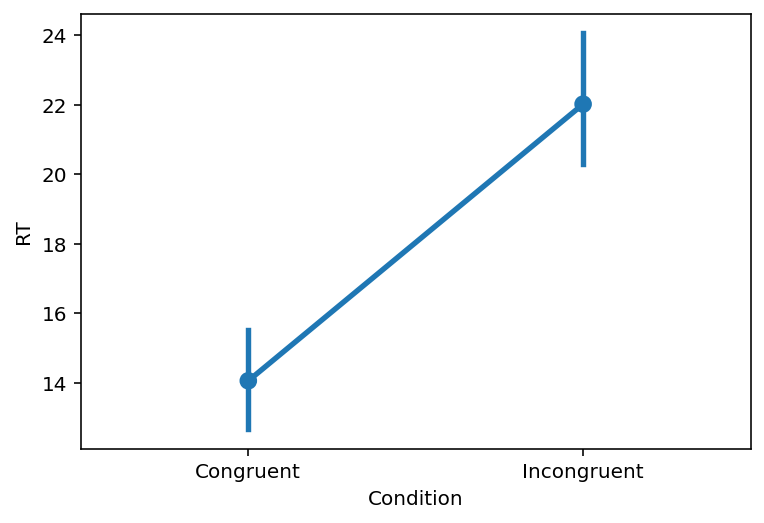

In [40]:
sns.pointplot(data = df_stroop, x = "Condition", y = "RT")

### Check-in

Load the `tips` dataset from `seaborn` and fit a linear model predicting `tip` from `time`. 

- Inspecting the model summary.
- How should you interpret the resulting coefficients?



In [41]:
df_tips = sns.load_dataset("tips")
### Your code here

#### Solution

The intercept reflects the mean `tip` for `Lunch`, and the slope reflects the *difference* in `tip` amount between `Lunch` and `Dinner`.

In [42]:
mod_tips = smf.ols(data = df_tips, formula = "tip ~ time").fit()
mod_tips.params

Intercept         2.728088
time[T.Dinner]    0.374582
dtype: float64

In [43]:
df_tips[['time', 'tip']].groupby("time").mean()

,tip
time,
Lunch,2.728088
Dinner,3.102670


### Variables with $>2$ levels?

Many categorical variables have $>2$ **levels**:

- `Assistant Professor` vs. `Associate Professor` vs. `Full Professor.
- Conditions `A`, `B`, and `C`. 
- `Europe` vs. `Asia` vs. `Africa` vs. `Americas` vs. `Oceania`.

By default, `statsmodels` will use **dummy coding**, choosing the *alphabetically first* level as the **reference level**.

#### Check-in

- Read in the dataset at `data/housing.csv`.  
- Then, build a linear model predicting `median_house_value` from `ocean_proximity`.  
- Inspect the model `summary()`. How should you interpret the results?

In [ ]:
### Your code here

#### Solution

In [51]:
df_housing = pd.read_csv("data/housing.csv")
mod_housing = smf.ols(data = df_housing, formula = "median_house_value ~ ocean_proximity").fit()
mod_housing.params

Intercept                        240084.285464
ocean_proximity[T.INLAND]       -115278.893463
ocean_proximity[T.ISLAND]        140355.714536
ocean_proximity[T.NEAR BAY]       19128.026326
ocean_proximity[T.NEAR OCEAN]      9349.691963
dtype: float64

In [52]:
df_housing[['ocean_proximity', 'median_house_value']].groupby("ocean_proximity").mean()

,median_house_value
ocean_proximity,
<1H OCEAN,240084.285464
INLAND,124805.392001
ISLAND,380440.000000
NEAR BAY,259212.311790
NEAR OCEAN,249433.977427


### How to *code* your variables?

> **Coding** refers to the approach taken to representing the different levels of a categorical variable in a regression model.

There are a [variety of different approaches to contrast coding](https://stats.oarc.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/), some of which are summarized below.

|Approach|Description|What is the `Intercept`?|What is the `Slope`?|
|--------|-----------|-------|----------|
|Dummy coding|Choose one level as **reference**.|`mean` of reference group.|Difference between that level and `mean` of reference group.|
|Deviation coding|Compare each level to **grand mean**.|`mean` of all groups.|Difference between that level and grand mean.|

And many more!

By default, `statsmodels` uses **dummy coding**.

## Conclusion

- The `statsmodels` package can be used to build **linear regression models**.  
- These models produce many useful *summary* features, including:
   - The fit $\beta$ parameters (**intercept** and **slope**). 
   - The **standard error** and **p-value** of those parameters.
- Each $\beta$ parameter has a particular interpretation with respect to $\hat{Y}$.